## Load the Dataset

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv('Cleaned_Data.csv')
df.head()

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing,Store Rooms,Places of Worship,Schools,Hospitals,Malls,Restaurants
0,KLCC,1250000.0,2,3.0,Serviced Residence,1335.0,Fully Furnished,1,53.0,24.0,20.0,5.0,818.0
1,KLCC,2400000.0,2,2.0,Serviced Residence,1006.0,Fully Furnished,0,53.0,24.0,20.0,5.0,818.0
2,KLCC,3600000.0,4,4.0,Serviced Residence,3897.0,Partly Furnished,0,53.0,24.0,20.0,5.0,818.0
3,KLCC,4280000.0,3,4.0,Serviced Residence,2195.0,Fully Furnished,1,53.0,24.0,20.0,5.0,818.0
4,KLCC,2300000.0,1,2.0,Serviced Residence,1023.0,Partly Furnished,0,53.0,24.0,20.0,5.0,818.0


In [3]:
# Set the color palette to 'rocket'
rocket_colors = sns.color_palette('rocket')

# Select the color at index 4
selected_color = rocket_colors[4]

## EDA

### What is the distribution of price?

Text(0.5, 0, 'Price (millions of RM)')

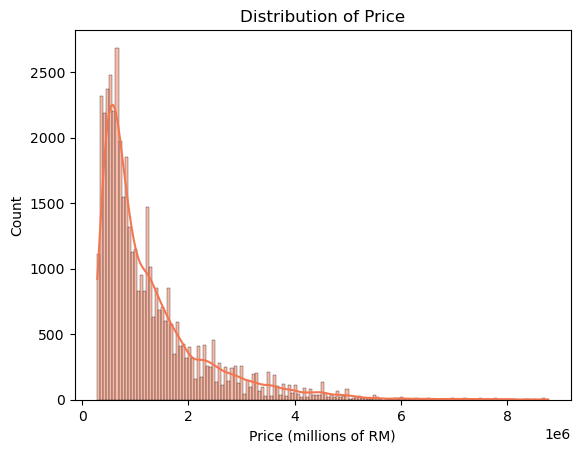

In [11]:
# Plot histplot for Price

sns.histplot(df['Price'], kde=True, color=selected_color)
plt.title('Distribution of Price')
plt.xlabel('Price (millions of RM)')

### What are the distributions of the numeric independent variables?

Text(0.5, 0.98, 'Distributions of Numeric Independent Variables')

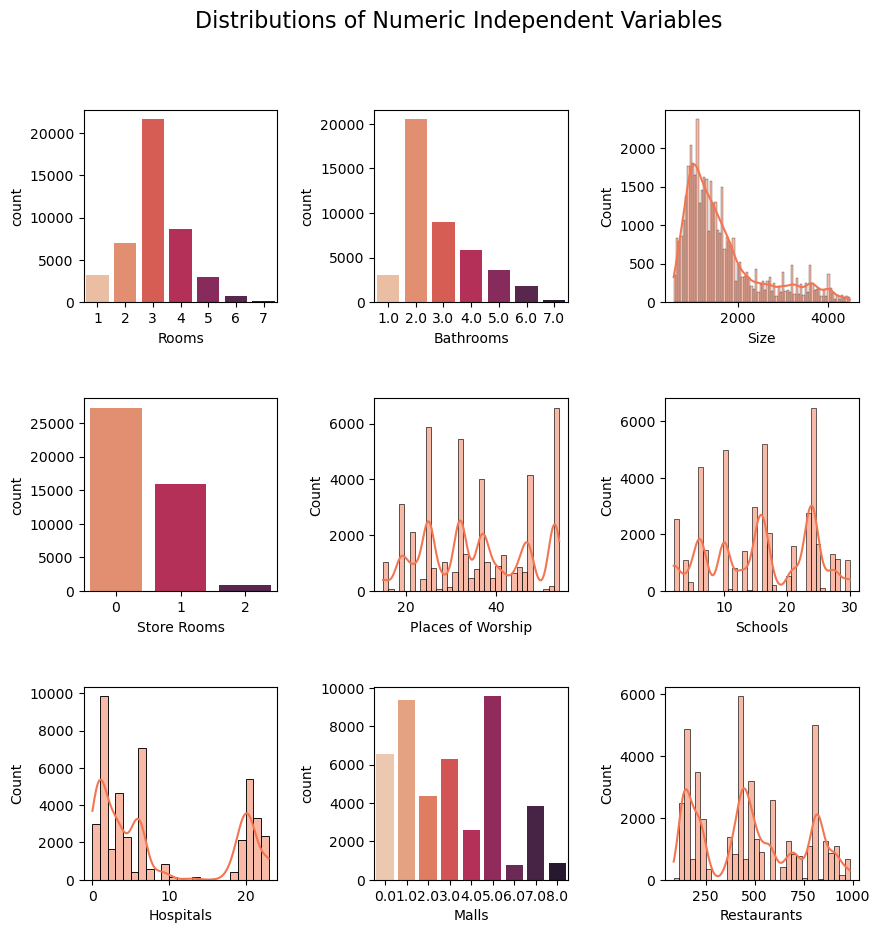

In [15]:
# Plot distributions of numeric independent variables using countplots and histplots

fig, ax = plt.subplots(3, 3, figsize=(10, 10))

sns.countplot(data=df, x='Rooms', palette='rocket_r', ax=ax[0, 0])

sns.countplot(data=df, x="Bathrooms", palette='rocket_r', ax=ax[0, 1])

sns.histplot(df['Size'], kde=True, color=selected_color, ax=ax[0, 2])

sns.countplot(data=df, x='Store Rooms', palette='rocket_r', ax=ax[1, 0])

sns.histplot(df["Places of Worship"], kde=True, color=selected_color,\
             ax=ax[1, 1])

sns.histplot(df["Schools"], kde=True, color=selected_color, ax=ax[1, 2])

sns.histplot(df["Hospitals"], kde=True, color=selected_color, ax=ax[2, 0])

sns.countplot(data=df, x="Malls", palette='rocket_r', ax=ax[2, 1])

sns.histplot(df["Restaurants"], kde=True, color=selected_color, ax=ax[2, 2])

plt.subplots_adjust(hspace=0.5, wspace=0.5)

fig.suptitle('Distributions of Numeric Independent Variables', fontsize=16)

### What is the count of each property type?

Text(0.5, 1.0, 'Count of Each Property Type')

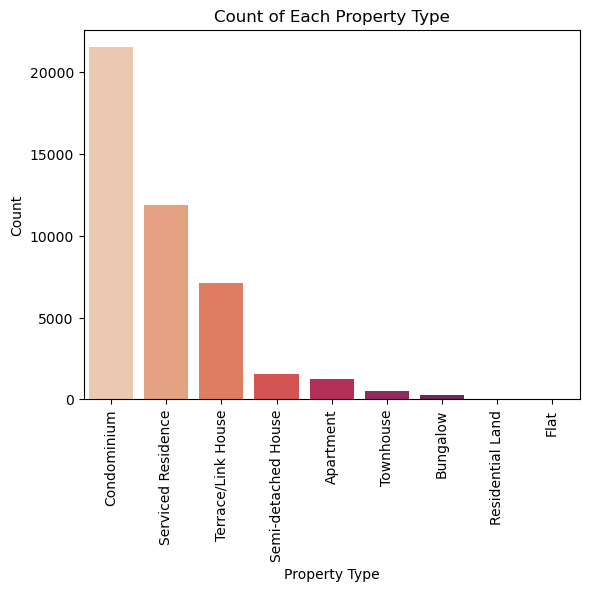

In [16]:
# Plot countplot for Property Type

order = df['Property Type'].value_counts().index
sns.countplot(x='Property Type', data=df, order=order, palette='rocket_r')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Count of Each Property Type')

### Which are the most expensive locations?

In [20]:
# Group by Location and calculate the median price
mean_prices = df.groupby('Location')['Price'].mean()

# Get the top 10 locations with the highest median prices
top_10_locations = mean_prices.nlargest(10).index

# Filter the DataFrame to include only the top 10 locations
filtered_df = df[df['Location'].isin(top_10_locations)]

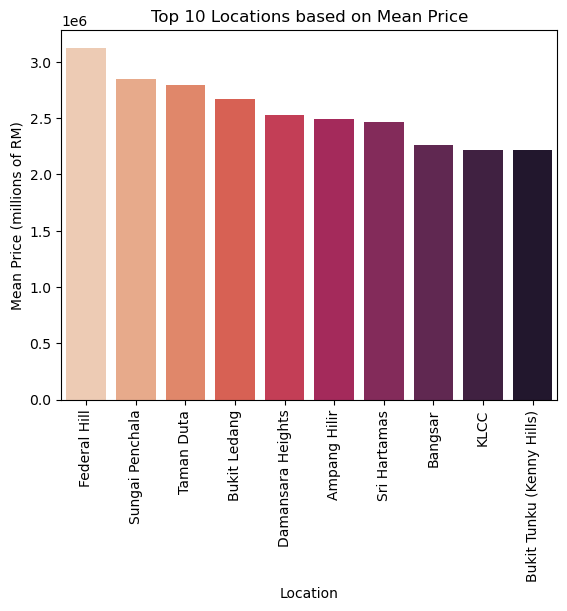

In [23]:
# Plot boxplot for top 10 locations based on median price

order = filtered_df.groupby('Location')['Price'].mean().\
            sort_values(ascending=False).index
sns.barplot(x=filtered_df['Location'], y=filtered_df['Price'], order=order,\
           palette='rocket_r', errorbar=None)
plt.xticks(rotation=90)
plt.title('Top 10 Locations based on Mean Price')
plt.xlabel('Location')
plt.ylabel('Mean Price (millions of RM)')
plt.show()

### How does size vary by property type?

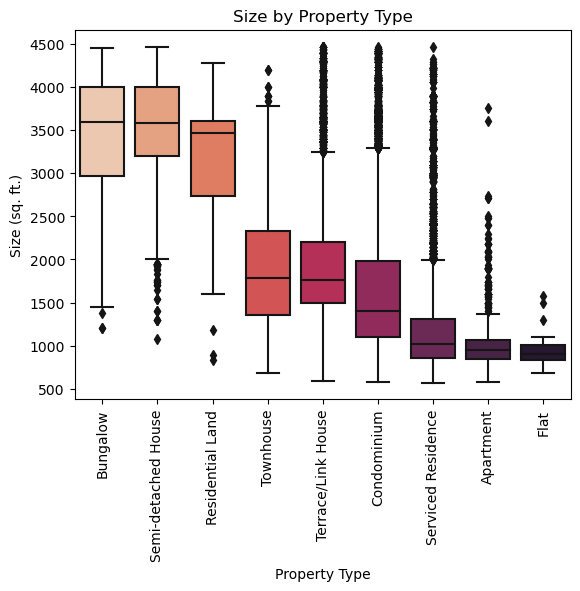

In [4]:
# Plot boxplots for Size by Property Type

order = df.groupby('Property Type')['Size'].median().\
            sort_values(ascending=False).index
sns.boxplot(x=df['Property Type'], y=df['Size'], order=order,\
            palette='rocket_r')
plt.xticks(rotation=90)
plt.title('Size by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Size (sq. ft.)')
plt.show()

### What is the correlation between the numeric variables?

C:\Users\Gan Kai Feng\AppData\Local\Temp\ipykernel_16164\1903889756.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


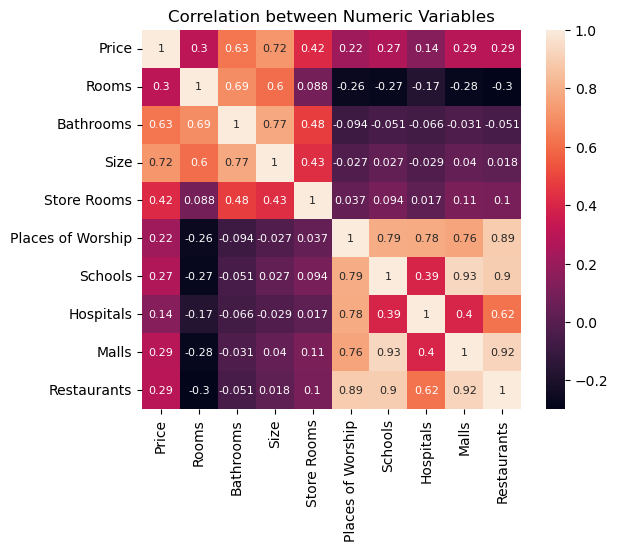

In [10]:
# Plot the correlation

corr = df.corr()
sns.heatmap(corr, annot=True, vmax=1, square=True, annot_kws={"fontsize":8})
plt.title('Correlation between Numeric Variables')
plt.subplots_adjust(top=0.9)
plt.show()